## A more advanced application of the EM algorithm

What about a slightly more complicated situation? Suppose we have a set of eruptions from two geysers in Yellowstone Park. Yes, I'm talking about the Old Faithful data.

Let's suppose we have three geysers. We'll assume each geyser's eruptions follow a Normal distribution. We'd like to estimate 
- the mean eruption location of each geyser
- its variance (the shape the eruptions take around the mean)

and 
- the relative likelihood of each geyser erupting

Now that we know the steps of the process, we can streamline our proof a little bit.

### Parameters

We will need our parameters, these are:

- $p0, p1, p2$, the relative probabilities of each geyser erupting. We know that $p2 = 1 - p0 - p1$, so we might leave out $p2$ in some of our analysis

- The mean and variance for each of our normal distributions: $\mu_0, \Sigma_0, \mu_1, \Sigma_1, \mu_2, \Sigma_2$

### Observations

- Our observed variables are simply the locations of the $n$ eruptions: $z_i$ for $i = 0, ..., n$, each $z_i$ is a 2D location $(z_{i,1}, z_{i,2})$.

### Hidden variables

- Our hidden/latent variables are *which geyser was responsible for which eruption*, $x_i$ for $i = 0, ..., n$, where $x_i \in [0, 1, 2]$

## The update rule

Remember, the quantity we will maximise on each step of the EM algorithm is 

$$
h_t(\theta) = \sum_x P(x | z, \theta^{(t)}) \log P(z, x |\ \theta)
$$

This means:
- first, identify $P(x | z, \theta^{(t)})$, the probability of the hidden variables $x$ given the observations $z$ and the current best guess of the parameters $\theta^{(t)}$. This will evaluate to some fixed set of numbers - remember, $z$ and $\theta^{(t)}$ are both known quantitites.
- then, maximise $h_t(\theta)$ over $\theta$. In practice, this will usually involve some partial differentiation and maximisation over each of the parameters in $\theta$ simultaneously.

## Step 1: evaluate $P(x | z, \theta^{(t)})$

We will need to calculate the probability of the latent variables $x_i$, given the observed ones $z_i$ and our current best estimate of the parameters, $\theta^{(t)}$.

Well, for each eruption $i$, we have three possible normal distributions for it to have been drawn from. The likelihood of the eruption being from each geyser is calculated from the relative height of each geyser's pdf at the eruption's location. For example, if the location is very close to the our best guess of the mean of geyser 2, and far away from our best guess of the means of geysers 0 and 1, then it's very probable that the eruption is from geyser 2.

Let's user our $P_t$ notation to mean "conditional on all the current best guess parameters $\theta_t$".

\begin{align}
P_t(x_i = j | z_i) & = P(x_i | z_i, \theta^{(t)}) = P \left( \text{eruption } i \text{ came from geyser } j \text{ given } z_i \text{ and the current parameters} \right)  \\
\end{align}

We use Bayes' rule to find this probability, for each eruption $i$ and geyser $j$.

\begin{align}
P_t(x_i = j | z_i) 
& = \frac{ P_t(x_i = j, z_i) }{ P_t(z_i) } \\
& = \frac{ P_t(x_i = j, z_i) }{ \sum_k P_t(x_i = k, z_i) } \\
& = \frac{ p_j \phi \left( z_i ; \mu_j^{(t)}, \Sigma_j^{(t)} \right) }{\sum_k p_k \phi \left( z_i ; \mu_k^{(t)}, \Sigma_k^{(t)} \right)}
\end{align}

where $\phi(\mu, \Sigma)$ represents the PDF of a 2D Normal distribution with mean $\mu$ and covariance matrix $\Sigma$.

Let's call $P_t(x_i = j | z_i)$, the probabilities of our unobserved data at step $t$, "weights" and label them 

$$w^{(t)}_{i,j}$$

So $w^{(t)}_{i,j}$ is the probability that eruption $i$ comes from geyser $j$, given our best estimate of the parameters at step $t$ of the EM algorithm. Note that they are just numbers that can be calculated from the observed data $z_i$ and our current best guess of the parameters $\theta^{(t)}$.

## Step 2: maximise $h_t(\theta)$

Now, to perform our update we'll need to calculate the new value of $\theta$ that maximises our weighted likelihood function

$$ h_t(\theta) = \sum_j w^{(t)}_{i,j} \log P(z, x | \theta )$$

Let's write down the form of the log likelihood of the complete data including $x$ and $z$.

We have

\begin{align}
P(x, z | \theta) 
& = \prod_i P(z_i, x_i | \theta) \\
& = \prod_i P(z_i | x_i, \theta) P(x_i | \theta) \\
& = \prod_i \phi(z_i ; \mu_{x_i}, \Sigma_{x_i}) p_{x_i} \\
\end{align}

When we take logarithms, we get

\begin{align}
\log P(z, x | \theta) 
& = \sum_i \left( \log \phi(z_i ; \mu_{x_i}, \Sigma_{x_i}) + \log p_{x_i} \right) \\
& = \sum_i - \log 2\pi - \frac{1}{2} \log |\Sigma_{x_i}| - \frac{1}{2} (z_i - \mu_{x_i})^T \Sigma_{x_i}^{-1} (z_i - \mu_{x_i}) + \log p_{x_i}
\end{align}

And so the final form of $h_t$ is

$$ h_t(\theta) = \sum_{i=1}^n \sum_{j=0}^2 w^{(t)}_{i,j} \left( \log p_j - \log 2\pi - \frac{1}{2} \log |\Sigma_j| - \frac{1}{2} (z_i - \mu_j)^T \Sigma_j^{-1} (z_i - \mu_j) \right) $$

Let's see if we can maximise this expression w.r.t. each of the parameters in turn, starting with the easiest.

First, we must maximise the expression with respect to the $p_j$ values - however, we have the **constraint** that $p_0 + p_1 + p_2 = 1$.

Therefore, to perform this maximisation we must use Lagrange multipliers.

We must find a maximum of the function

$$h_t(\theta) - \lambda (p_0 + p_1 + p_2 - 1)$$

with respect to both $\theta$ and $\lambda$.


## Derivatives w.r.t. $p_j$

We differentiate w.r.t. each of the $p_j$, and also w.r.t. $\lambda$, to get a set of simultaneous equations at which we will find a maximum.

We find

\begin{align}
\sum_i w^{(t)}_{i,0} \frac{1}{p_0} - \lambda & = 0 \\
\sum_i w^{(t)}_{i,1} \frac{1}{p_1} - \lambda & = 0 \\
\sum_i w^{(t)}_{i,2} \frac{1}{p_2} - \lambda & = 0 \\
 p_0 + p_1 + p_2 - 1 &= 0 \\
\end{align}

\begin{align}
 \implies && \frac{\sum_i w^{(t)}_{i,0}}{\lambda} & = p_0 \\
  && \frac{\sum_i w^{(t)}_{i,1}}{\lambda} & = p_1 \\
  && \frac{\sum_i w^{(t)}_{i,2}}{\lambda} & = p_2 \\
  && p_0 + p_1 + p_2 &= 1 \\
\end{align}

Substituting the values of $p_0, p_1, p_2$ from the first 3 equations into the last equation, we find that:

\begin{align}
 \frac{\sum_i w^{(t)}_{i,0}}{\lambda} + \frac{\sum_i w^{(t)}_{i,1}}{\lambda} + \frac{\sum_i w^{(t)}_{i,2}}{\lambda} & = 1 \\
 \implies \sum_i w^{(t)}_{i,0} + \sum_i w^{(t)}_{i,1} + \sum_i w^{(t)}_{i,2} & = \lambda \\
\end{align}

But we know that for any value of $i$, we have 


$$ w^{(t)}_{i,0} + w^{(t)}_{i,1} + w^{(t)}_{i,2} = 1 $$

therefore 

$$ \sum_i w^{(t)}_{i,0} + \sum_i w^{(t)}_{i,1} + \sum_i w^{(t)}_{i,2} = n $$

So therefore  $\lambda = n$, the number of eruptions that we are analysing.

And substituting this back into the above, we have our new best estimates of $p_0$, $p_1$ and $p_2$:

\begin{align}
p_0 & = \frac{\sum_i w^{(t)}_{i,0}}{n} \\
p_1 & = \frac{\sum_i w^{(t)}_{i,1}}{n} \\
p_2 & = \frac{\sum_i w^{(t)}_{i,2}}{n} \\
\end{align}

## Derivatives w.r.t. $\mu_j$


What about the derivative with respect to the normal means, $\mu_j$?

$$ h_t(\theta) = \sum_i \sum_j w^{(t)}_{i,j} \left( \log p_j - \log 2\pi - \log \frac{1}{2} |\Sigma_j| - \frac{1}{2} (z_i - \mu_j)^T \Sigma_j^{-1} (z_i - \mu_j) \right) $$

therefore 

$$ \frac{\partial h_t}{\partial \mu_j} = \sum_i w^{(t)}_{i,j} \frac{\partial}{\partial \mu_j} \left( - \frac{1}{2} (z_i - \mu_j)^T \Sigma_j^{-1} (z_i - \mu_j) \right) $$

Using the matrix cookbook, we find that the derivative is actually quite easy:

\begin{align}
\frac{\partial h_t}{\partial \mu_j} 
& = \sum_i w^{(t)}_{i,j} \left( - \frac{1}{2} \left( -2 \Sigma_j^{-1} (x_i - \mu_j) \right) \right) \\
& = \Sigma_j^{-1} \sum_i w^{(t)}_{i,j}  (x_i - \mu_j)
\end{align}

And setting the derivative equal to zero, we find
\begin{align}
0 & =  \Sigma_j^{-1} \sum_i w^{(t)}_{i,j}  (z_i - \mu_j) \\
0 & =  \sum_i w^{(t)}_{i,j}  (z_i - \mu_j) \\
 \mu_j & = \sum_i w^{(t)}_{i,j} z_i \\
 \mu_j & = \frac{ \sum_i w^{(t)}_{i,j} z_i }{ \sum_i w^{(t)}_{i,j}  } \\
\end{align}

Here we have used the fact that $\Sigma_j$ is positive semi-definite to remove it from the equation.

### Derivatives w.r.t. $\Sigma_j$

What about the derivative with respect to the normal variances $\Sigma_j$?

$$ h_t(\theta) = \sum_i \sum_j w^{(t)}_{i,j} \left( \log p_j - \log 2\pi - \frac{1}{2} \log |\Sigma_j| - \frac{1}{2} (z_i - \mu_j)^T \Sigma_j^{-1} (z_i - \mu_j) \right) $$

Again, we can use the Matrix Cookbook. We find two important formulas there: for a matrix $S$

$$  \frac{d |S|}{d S} = |S| \left( S^{-1} \right)^T$$

which means that
$$  \frac{d}{d S} \log |S| = \frac{1}{|S|} |S| \left( S^{-1} \right)^T = \left( S^{-1} \right)^T$$

which, for our covariance matrices, which are symmetric, means that 
$$  \frac{d}{d \Sigma_j} \log |\Sigma_j| = \Sigma_j^{-1} $$

The matrix cookbook also tells us that

$$\frac{d}{d X} a^T X^{-1} a = - {X^{-1}}^T a a^T {X^{-1}}^T$$

so, we have

$$\frac{d}{d \Sigma_j} (z_i - \mu_j)^T \Sigma_j^{-1} (z_i - \mu_j) = - \Sigma_j^{-1} (z_i - \mu_j)(z_i - \mu_j)^T \Sigma_j^{-1} $$

due to the symmetry of $\Sigma_j^{-1} $

Putting this together, we have

$$ h_t(\theta) = \sum_i \sum_j w^{(t)}_{i,j} \left( \log p_j - \log 2\pi - \frac{1}{2} \log |\Sigma_j| - \frac{1}{2} (z_i - \mu_j)^T \Sigma_j^{-1} (z_i - \mu_j) \right) $$

therefore

\begin{align}
\frac{d h_t}{d \Sigma_j}
& = \sum_i w^{(t)}_{i,j} \left( - \frac{1}{2} \Sigma_j^{-1}  + \frac{1}{2} \Sigma_j^{-1} (z_i - \mu_j) (z_i - \mu_j)^T \Sigma_j^{-1} \right)
\end{align}

Setting this to zero, we find

\begin{align}
&& 0 & = \sum_i w^{(t)}_{i,j} \left( - \frac{1}{2} \Sigma_j^{-1}  + \frac{1}{2} \Sigma_j^{-1}  (x_i - \mu_j) (x_i - \mu_j)^T \Sigma_j^{-1}  \right) \\
\implies && \sum_i w^{(t)}_{i,j} \frac{1}{2} \Sigma_j^{-1} & = \sum_i w^{(t)}_{i,j} \left( \frac{1}{2} \Sigma_j^{-1} (x_i - \mu_j) (x_i - \mu_j)^T \Sigma_j^{-1} \right) \\
\implies && \sum_i w^{(t)}_{i,j} & = \sum_i w^{(t)}_{i,j} \left( \Sigma_j^{-1} (x_i - \mu_j) (x_i - \mu_j)^T \right) \\
\implies && \sum_i w^{(t)}_{i,j} & = \Sigma_j^{-1} \sum_i w^{(t)}_{i,j} \left( (x_i - \mu_j) (x_i - \mu_j)^T \right) \\
\implies && \Sigma_j \sum_i w^{(t)}_{i,j} & = \sum_i w^{(t)}_{i,j} \left( (x_i - \mu_j) (x_i - \mu_j)^T \right) \\
\implies && \Sigma_j  & = \frac{ \sum_i w^{(t)}_{i,j} \left( (x_i - \mu_j) (x_i - \mu_j)^T \right) }{ \sum_i w^{(t)}_{i,j} } \\
\end{align}

What value of $\mu_j$ should we use in the above equations? Well, in fact, we should have solved all the derivative equations simultaneously to find a maximum, so we should substitute the solution we found above for $\mu_j$ in the equation for $\Sigma_j$.

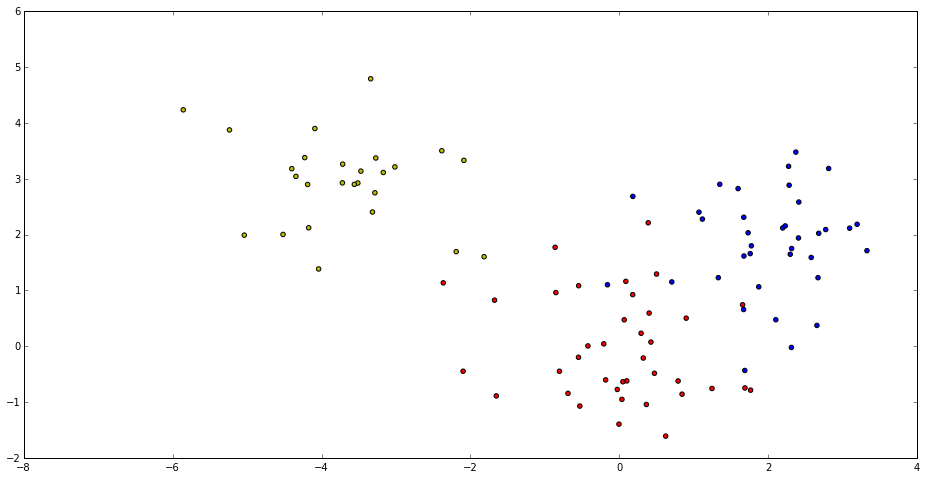

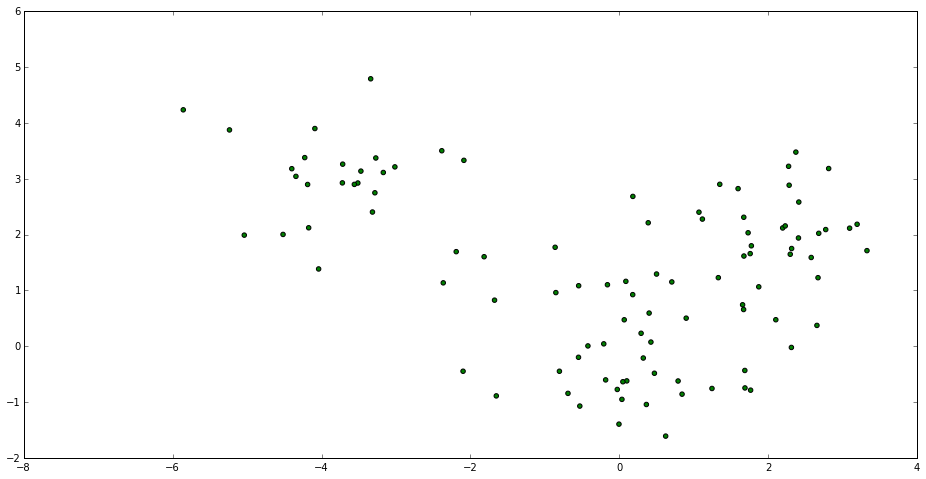

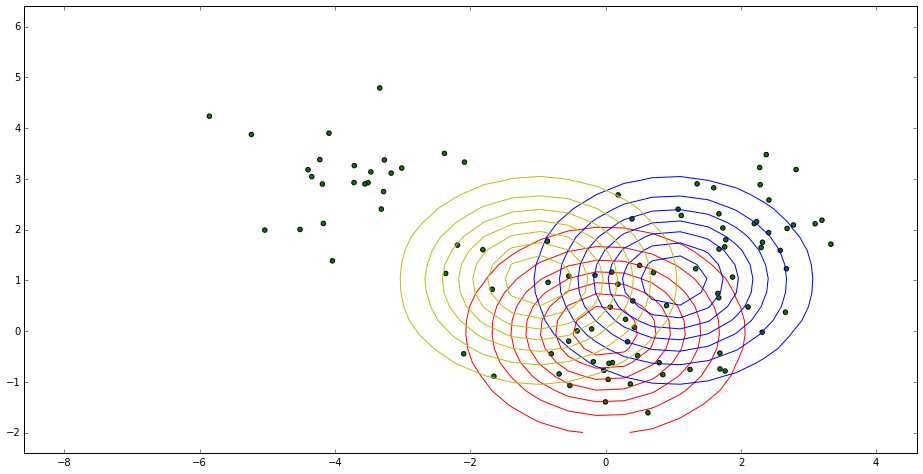

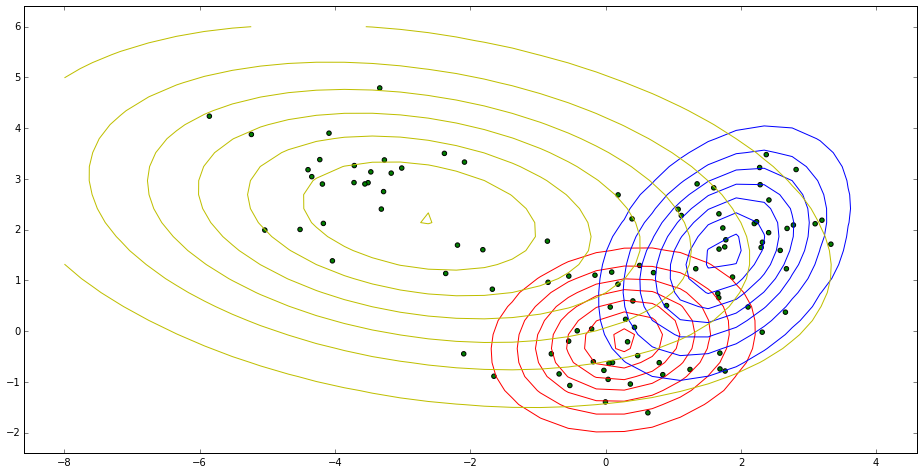

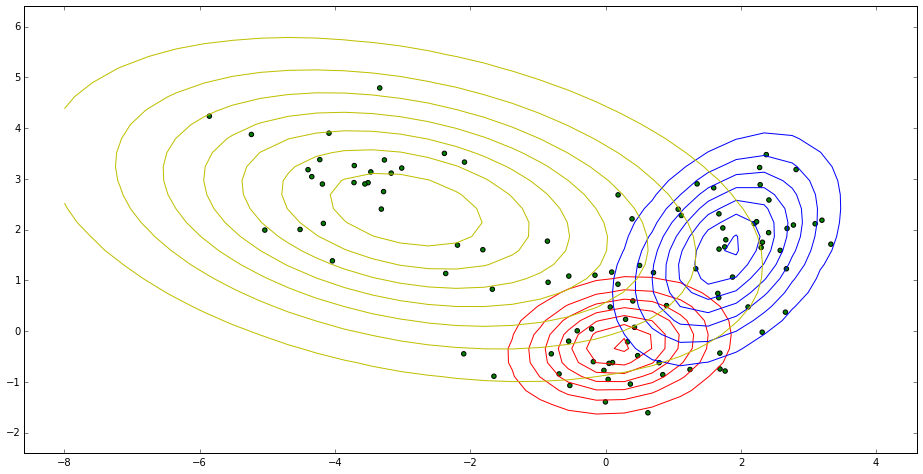

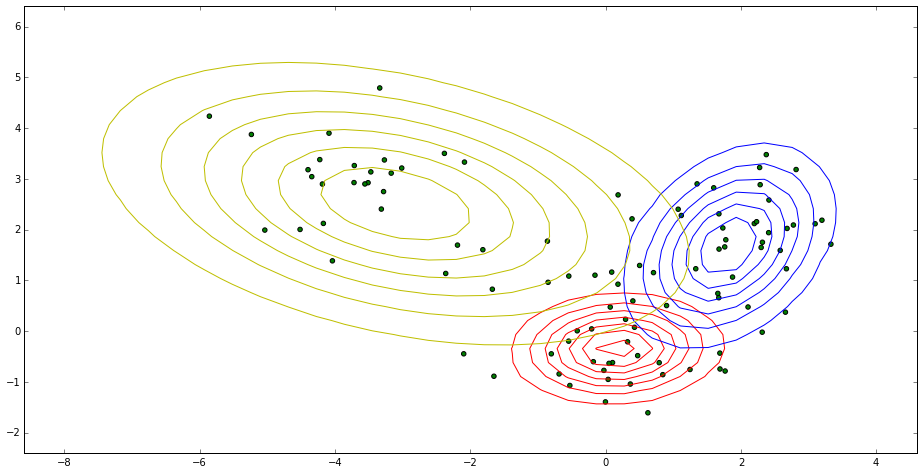

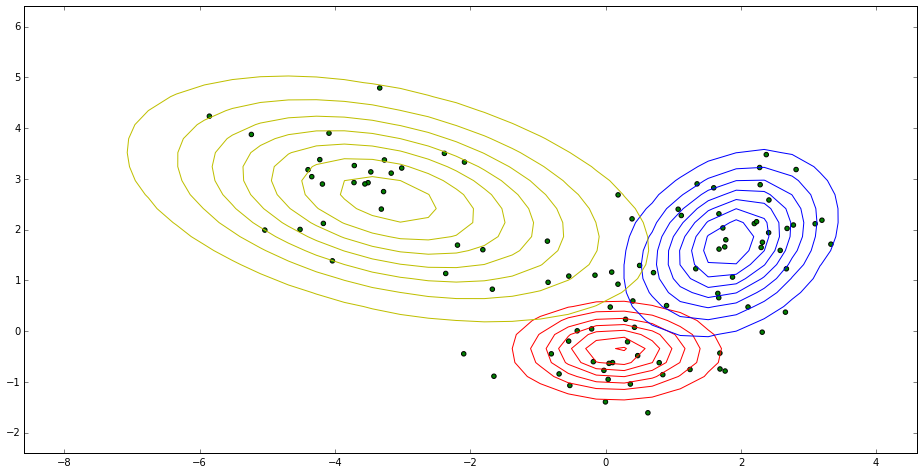

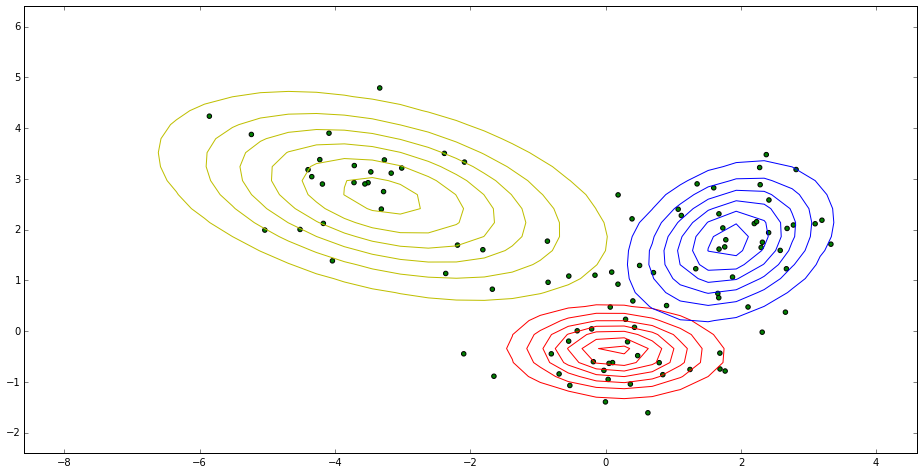

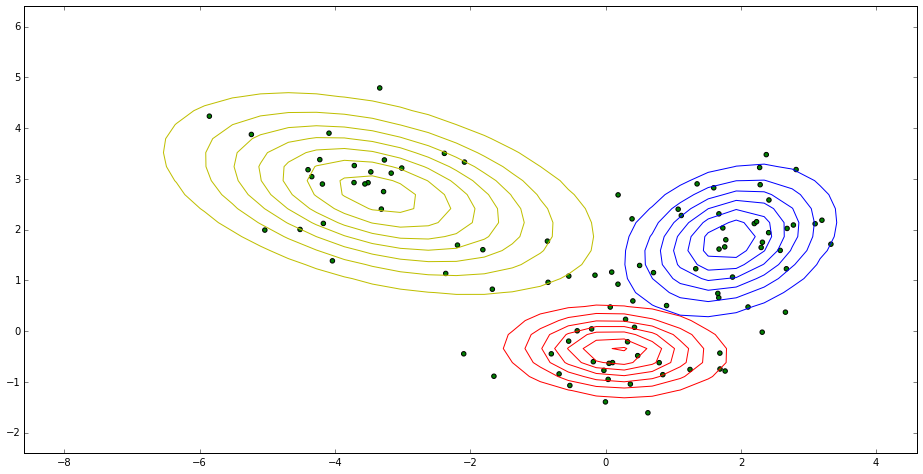

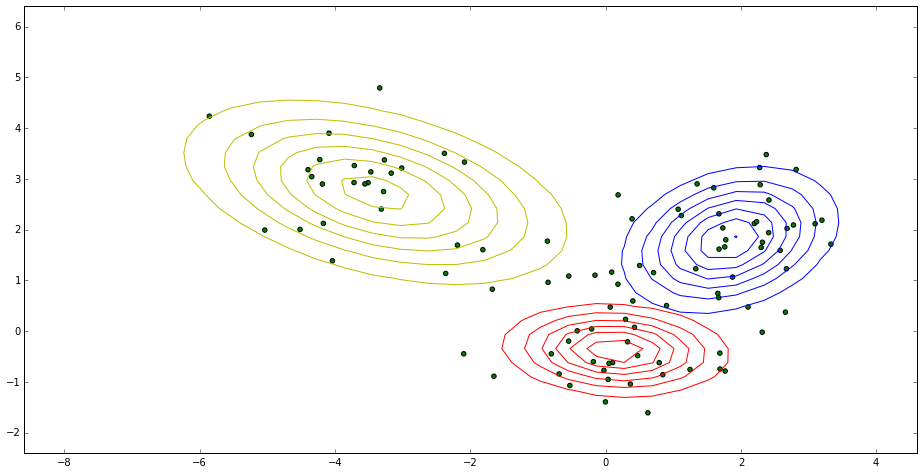

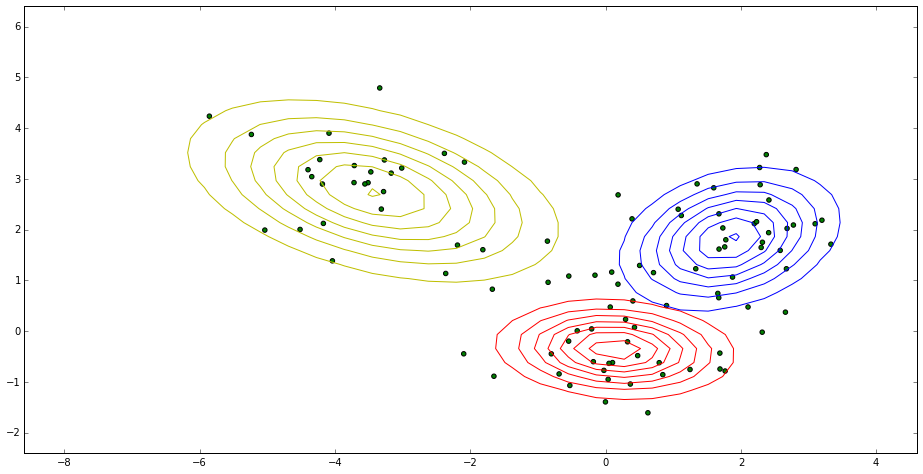

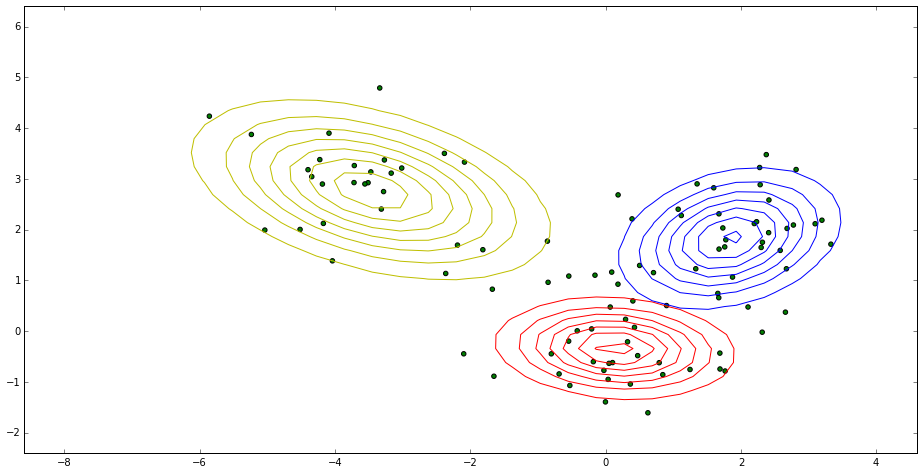

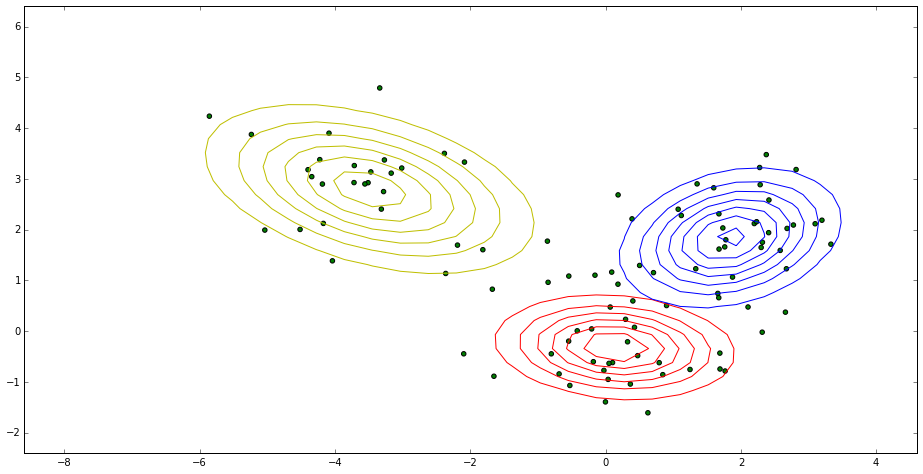

{'mu': [array([ 0.14493026, -0.31785942]),
        array([ 1.83619493,  1.83610469]),
        array([-3.49330572,  2.79996948])],
 'p': array([ 0.32599576,  0.38792322,  0.28608102]),
 'sigma': [array([[ 0.88607441, -0.06310271],
       [-0.06310271,  0.51290667]]),
           array([[ 0.80748033,  0.14865936],
       [ 0.14865936,  0.68749818]]),
           array([[ 1.24383542, -0.44944539],
       [-0.44944539,  0.85030472]])]}
